In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
#add comment

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
'''for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]'''

'for i in range(len(cities)):\n\n    # Group cities in sets of 50 for logging purposes.\n    if (i % 50 == 0 and i >= 50):\n        set_count += 1\n        record_count = 1\n    # Create endpoint URL with each city.\n    city_url = url + "&q=" + cities[i]'

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | gillette
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | llanes
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | chumikan
Processing Record 15 of Set 1 | kondinskoye
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | north myrtle beach
Processing Record 18 of Set 1 | barbar
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | les cayes
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1 | clyde river
Processing Record 24

Processing Record 37 of Set 4 | broome
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | kindersley
Processing Record 40 of Set 4 | tahta
Processing Record 41 of Set 4 | jurado
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | phan rang
City not found. Skipping...
Processing Record 44 of Set 4 | trinidad
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | bubaque
Processing Record 47 of Set 4 | plock
Processing Record 48 of Set 4 | moba
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | san mateo ixtatan
Processing Record 1 of Set 5 | kendari
Processing Record 2 of Set 5 | yongan
Processing Record 3 of Set 5 | satitoa
City not found. Skipping...
Processing Record 4 of Set 5 | laguna
Processing Record 5 of Set 5 | the valley
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | itaueira
Processing Record 9 of Set 5 |

City not found. Skipping...
Processing Record 27 of Set 8 | cloquet
Processing Record 28 of Set 8 | podgornoye
Processing Record 29 of Set 8 | kawai
Processing Record 30 of Set 8 | shatalovo
Processing Record 31 of Set 8 | nikel
Processing Record 32 of Set 8 | zanatepec
City not found. Skipping...
Processing Record 33 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 8 | rutland
Processing Record 35 of Set 8 | shellbrook
Processing Record 36 of Set 8 | capelinha
Processing Record 37 of Set 8 | sihora
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | ust-shonosha
Processing Record 40 of Set 8 | suzhou
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | kaeo
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | benjamin constant
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | katherine
Processing Record 48 

Processing Record 12 of Set 12 | greenwood
Processing Record 13 of Set 12 | diego de almagro
Processing Record 14 of Set 12 | emerald
Processing Record 15 of Set 12 | kroya
Processing Record 16 of Set 12 | padang
Processing Record 17 of Set 12 | pakxan
Processing Record 18 of Set 12 | rio grande
Processing Record 19 of Set 12 | bermeo
Processing Record 20 of Set 12 | azimur
City not found. Skipping...
Processing Record 21 of Set 12 | douentza
Processing Record 22 of Set 12 | canyon lake
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | omboue
Processing Record 25 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 26 of Set 12 | amapa
Processing Record 27 of Set 12 | envira
Processing Record 28 of Set 12 | awbari
Processing Record 29 of Set 12 | eureka
Processing Record 30 of Set 12 | mocambique
City not found. Skipping...
Processing Record 31 of Set 12 | hasaki
Processing Record 32 of Set 12 | ninghai
Processing Record 33 of Set 12 | saleaula
City not found.

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,83.93,65,1,12.66,US,2021-07-31 23:16:22
1,Port Alfred,-33.5906,26.8910,65.86,34,100,7.94,ZA,2021-07-31 23:16:23
2,Albany,42.6001,-73.9662,71.37,56,43,6.24,US,2021-07-31 23:16:24
3,Pisco,-13.7000,-76.2167,64.45,77,0,10.36,PE,2021-07-31 23:13:49
4,Mataura,-46.1927,168.8643,48.47,100,100,1.99,NZ,2021-07-31 23:16:25
5,Gillette,44.2911,-105.5022,83.80,28,46,8.99,US,2021-07-31 23:15:52
6,Ushuaia,-54.8000,-68.3000,40.66,75,75,18.41,AR,2021-07-31 23:15:04
7,Punta Arenas,-53.1500,-70.9167,39.31,65,0,13.80,CL,2021-07-31 23:16:26
8,San Quintin,30.4833,-115.9500,75.79,66,40,13.73,MX,2021-07-31 23:16:26
9,Kapaa,22.0752,-159.3190,86.32,68,75,3.00,US,2021-07-31 23:16:27


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-07-31 23:16:22,19.7297,-155.0900,83.93,65,1,12.66
1,Port Alfred,ZA,2021-07-31 23:16:23,-33.5906,26.8910,65.86,34,100,7.94
2,Albany,US,2021-07-31 23:16:24,42.6001,-73.9662,71.37,56,43,6.24
3,Pisco,PE,2021-07-31 23:13:49,-13.7000,-76.2167,64.45,77,0,10.36
4,Mataura,NZ,2021-07-31 23:16:25,-46.1927,168.8643,48.47,100,100,1.99
5,Gillette,US,2021-07-31 23:15:52,44.2911,-105.5022,83.80,28,46,8.99
6,Ushuaia,AR,2021-07-31 23:15:04,-54.8000,-68.3000,40.66,75,75,18.41
7,Punta Arenas,CL,2021-07-31 23:16:26,-53.1500,-70.9167,39.31,65,0,13.80
8,San Quintin,MX,2021-07-31 23:16:26,30.4833,-115.9500,75.79,66,40,13.73
9,Kapaa,US,2021-07-31 23:16:27,22.0752,-159.3190,86.32,68,75,3.00


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

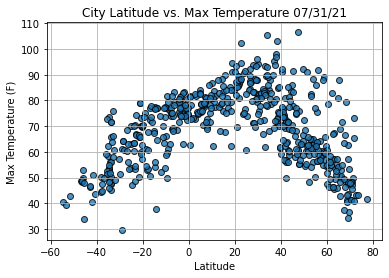

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor = "black", 
            linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

#Incroporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

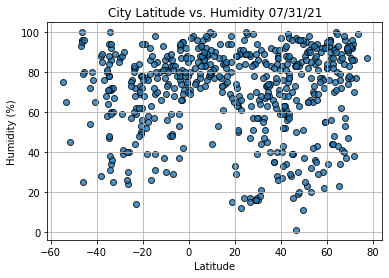

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

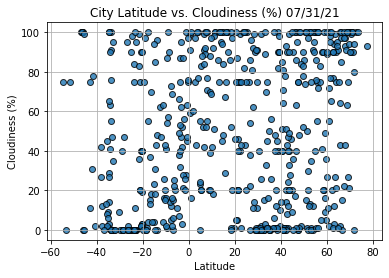

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

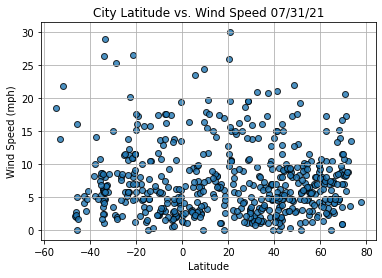

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                     Chumikan
Country                        RU
Date          2021-07-31 23:16:29
Lat                       54.7183
Lng                       135.315
Max Temp                    50.23
Humidity                       87
Cloudiness                    100
Wind Speed                   4.74
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-07-31 23:16:22,19.7297,-155.0900,83.93,65,1,12.66
2,Albany,US,2021-07-31 23:16:24,42.6001,-73.9662,71.37,56,43,6.24
5,Gillette,US,2021-07-31 23:15:52,44.2911,-105.5022,83.80,28,46,8.99
8,San Quintin,MX,2021-07-31 23:16:26,30.4833,-115.9500,75.79,66,40,13.73
9,Kapaa,US,2021-07-31 23:16:27,22.0752,-159.3190,86.32,68,75,3.00


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

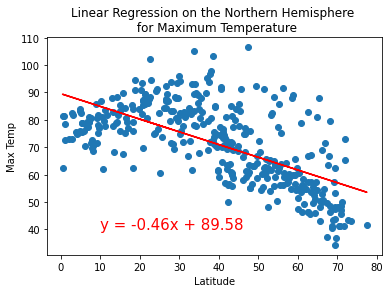

-0.6393909129037548

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

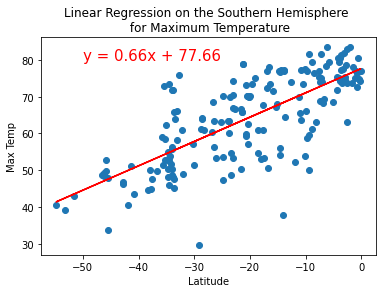

0.7413193757266809

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

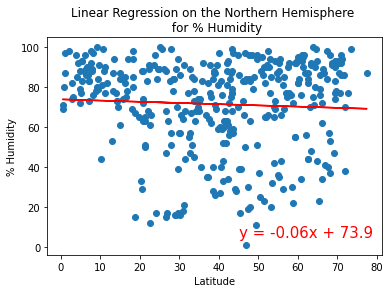

-0.05399107616304722

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,5))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

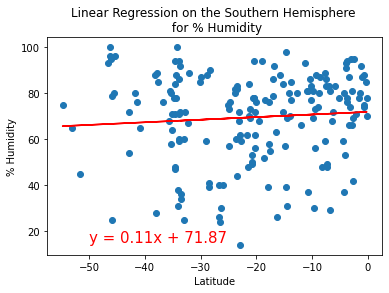

0.07987789581287356

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

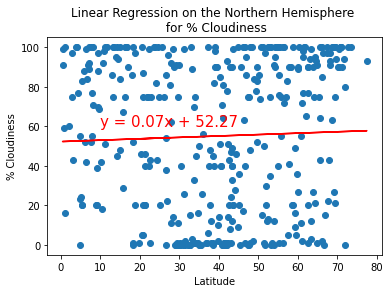

0.037078642556820196

In [81]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

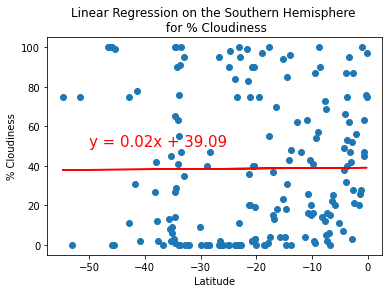

0.008115150544804418

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

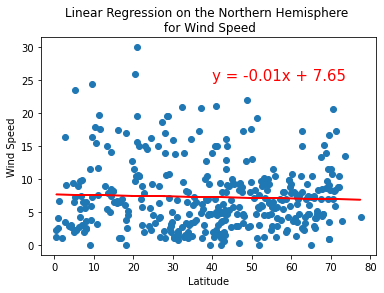

-0.0396110287798002

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value

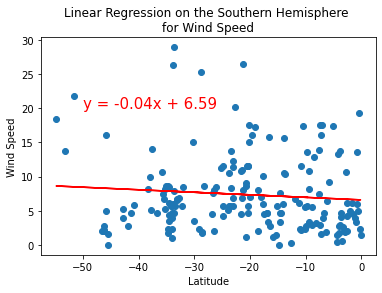

-0.0905890815034601

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
r_value